In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir('./RQ2/')


In [72]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from numpy import median

#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')

In [220]:
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
styles= ['-','--','-.',':']
markers= ['x', ',', 'o', 'v']
colors= ['blue','gray','firebrick','forestgreen']
results = {}

metrics = ['defect_expertiseloss','expertiseloss','far','workload']
metric_legend={'defect_expertiseloss':'CSR','expertiseloss':'expertise','far':'FaR','workload':'CoreWorkload'}
def drawPlot(data,repo,showLegend):
    plt.figure()
    fig = plt.figure()
#     fig.set_size_inches(16/3, 16/3)
    ax = fig.add_subplot(111)
    i=0;
    for metric in metrics:
        plt.plot(thresholds, data[metric], label=metric_legend[metric],color=colors[i%len(colors)], linestyle=styles[i%len(styles)],linewidth=3 )
        i+=1
    if showLegend:
        plt.legend()
    plt.ylabel(f"Median percentage of change for {repo}")

    plt.xlabel(r"Value of $P_D$")
    ax.xaxis.grid(True) # Show the vertical gridlines

    image_format = 'svg' # e.g .png, .svg, etc.
    image_name = f'{repo}_change_median.svg'

    plt.savefig(f'./{image_name}', format=image_format, dpi=1200)
    
    
def drawPlotSeaborn(df,showLegend=False):
    plt.figure()
    fig = plt.figure()
#     fig.set_size_inches(16/3, 16/3)
    ax = sns.pointplot(x="threshold", y="value", hue="metric", shape="metric", data=df\
                       , height=30, aspect=0.6,linestyles=styles,markers=markers\
                       ,plot_kws=dict(alpha=0.3), estimator=median,palette=colors)
    if not showLegend:
        ax.get_legend().remove()
    else:
        plt.legend(bbox_to_anchor=(0.97 ,.8), borderaxespad=0.)
    
    plt.setp(ax.collections, alpha=.95) #for the markers
    plt.setp(ax.lines, alpha=.6)       

    ax.set(xlabel=r"Value of $P_D$", ylabel=f"Median percentage of change for {repo}")

    ax.xaxis.grid(True) # Show the vertical gridlines
    plt.ylim(-60, 120)
    plt.show()
    image_format = 'svg' # e.g .png, .svg, etc.
    image_name = f'{repo}_pointplot_change_median.svg'
    fig = ax.get_figure()
    fig.savefig(f'./{image_name}', format=image_format, dpi=1200)



graph = {}
def getResults(repo,showLegend):
    for thr in thresholds: 
        results[thr] = {}
        for metric in metrics:
            temp = pd.read_csv(f'./{repo}/{thr}/{metric}.csv')
            l = len(temp)
            temp = temp.drop([l-1,l-2])
            results[thr][metric] = temp[temp.columns[1]].to_list()
            
    global graph
    graph = {}
    for metric in metrics:
        graph[metric] = [v[metric] for k, v in results.items()]
        
    rows = []

    # appending rows
    for thr in thresholds: 
        for metric in metrics:
            for period, number in enumerate(results[thr][metric]):
                rows.append({
                    "threshold": thr,
                    "metric": metric_legend[metric],
                    "value": number,
                    "period": period
                })
    df = pd.DataFrame(rows)
    drawPlotSeaborn(df,showLegend)
    return df

<Figure size 432x288 with 0 Axes>

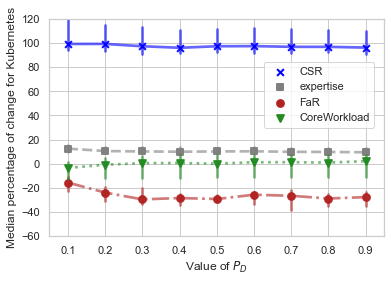

In [215]:
drawPlotSeaborn(x,True)

<Figure size 432x288 with 0 Axes>

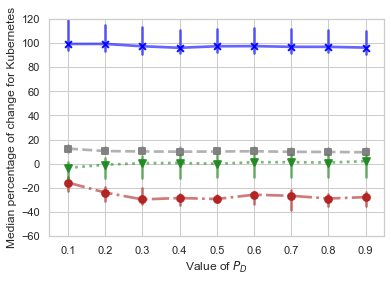

In [216]:
repo="Kubernetes"
x=getResults(repo,repo!="Kubernetes")

Roslyn


<Figure size 432x288 with 0 Axes>

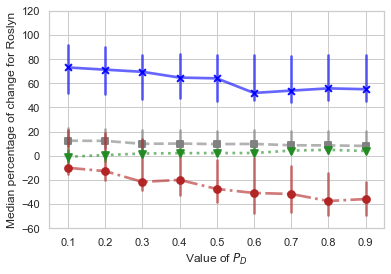

Rust


<Figure size 432x288 with 0 Axes>

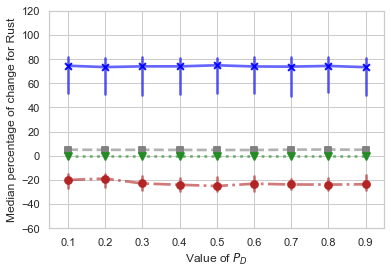

Kubernetes


<Figure size 432x288 with 0 Axes>

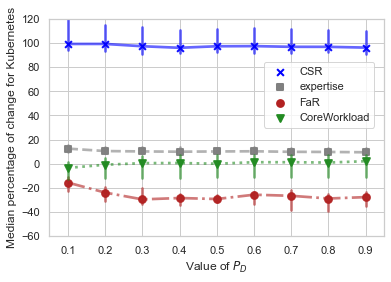

In [221]:
repos=['Roslyn','Rust','Kubernetes']
for repo in repos:
    print(repo)
    getResults(repo,repo=="Kubernetes")

Roslyn
Rust
Kubernetes
exp 8.37523480835788
far -24.765065552453446
workload 0.8656573279720791
CaR 77.81032808571128


<Figure size 432x288 with 0 Axes>

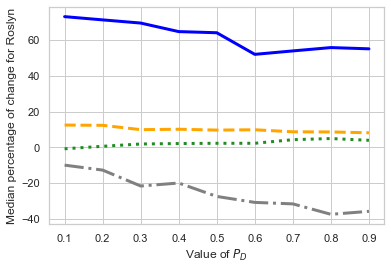

<Figure size 432x288 with 0 Axes>

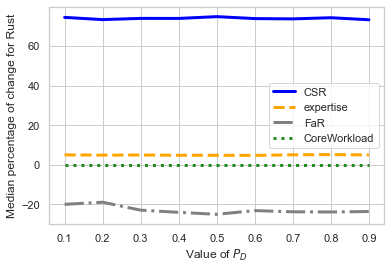

<Figure size 432x288 with 0 Axes>

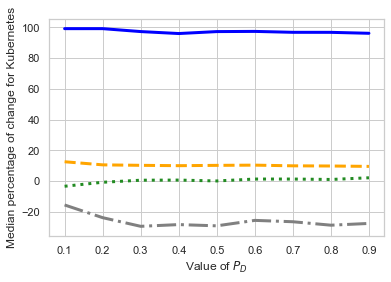

In [43]:
import statistics

metric_avg={'expertiseloss':0,'far':0,'workload':0,'CaR':0}
for repo in repos:
    print(repo)
    getResults(repo,repo=="Rust")
    metric_avg['expertiseloss'] += statistics.mean(graph['expertiseloss'])
    metric_avg['far'] += statistics.mean(graph['far'])
    metric_avg['workload'] += statistics.mean(graph['workload'])
    metric_avg['CaR'] += statistics.mean(graph['defect_expertiseloss'])


    
print('exp',metric_avg['expertiseloss']/len(repos))
print('far',metric_avg['far']/len(repos))
print('workload',metric_avg['workload']/len(repos))
print('CaR',metric_avg['CaR']/len(repos))
